In [5]:
import os, shutil
from keras import models 
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd 
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [6]:
model=models.Sequential()


model.add(layers.Conv2D(32,(3,3), activation= 'relu', input_shape =(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))



model.add(layers.Flatten())

model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:



training_set = train_datagen.flow_from_directory('Desktop/Leukimia DS/Train/', 
                                                 target_size = (64, 64),
                                                 batch_size = 1000,
                                                 class_mode = 'binary',
                                                shuffle = False)



Found 10661 images belonging to 2 classes.


In [9]:
test_set = test_datagen.flow_from_directory('Desktop/Leukimia DS/Test/', 
                                            target_size = (64, 64),
                                            batch_size = 300,
                                            class_mode = 'binary',
                                           shuffle = False)



Found 3553 images belonging to 2 classes.


In [10]:
val_set = test_datagen.flow_from_directory('Desktop/Leukimia DS/Val/', 
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                           shuffle = False)

Found 3144 images belonging to 2 classes.


In [ ]:
hist= model.fit(
        training_set,
        steps_per_epoch= 10,
        epochs= 25,
        validation_data=test_set,
        )

Epoch 1/25
 4/10 [===========>..................] - ETA: 2:14 - loss: 0.7315 - accuracy: 0.3159

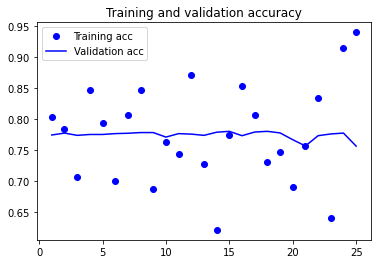

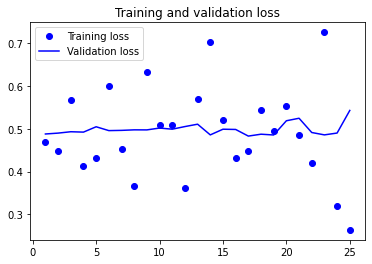

In [23]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [84]:
Y_pred = model.predict(test_set,63) # ceil(num_of_test_samples / batch_size)
Y_pred = (Y_pred>0.5)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, Y_pred))
print('Classification Report')
target_names = ['NORMAL', 'PNEUMONIA']
print(classification_report(test_set.classes, Y_pred, target_names=target_names))
    

Confusion Matrix
[[164  70]
 [  5 385]]
Classification Report
              precision    recall  f1-score   support

      NORMAL       0.97      0.70      0.81       234
   PNEUMONIA       0.85      0.99      0.91       390

    accuracy                           0.88       624
   macro avg       0.91      0.84      0.86       624
weighted avg       0.89      0.88      0.87       624



In [3]:
data= pd.read_csv('C-NMC_test_prelim_phase_data_labels.csv')

In [22]:
data

,Patient_ID,new_names,labels
0,UID_57_29_1_all.bmp,1.bmp,1
1,UID_57_22_2_all.bmp,2.bmp,1
2,UID_57_31_3_all.bmp,3.bmp,1
3,UID_H49_35_1_hem.bmp,4.bmp,0
4,UID_58_6_13_all.bmp,5.bmp,1
...,...,...,...
1862,UID_54_33_1_all.bmp,1863.bmp,1
1863,UID_55_24_1_all.bmp,1864.bmp,1
1864,UID_H32_20_1_hem.bmp,1865.bmp,0
1865,UID_54_30_2_all.bmp,1866.bmp,1


In [24]:
lista=list(range(1,len(data)+1)

In [30]:
data['Names']=lista
ALLdata=data[data['labels']==1]
HMEdata=data[data['labels']==0]

In [41]:
import os
from os import path
import shutil

src = "Desktop/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data"
dst = "Desktop/Leukimia DS/Val/ALL"
for j in range(len(ALLdata)):
    files = [i for i in os.listdir(src) if i.startswith(ALLdata['Names'].iloc[j].astype(str)) and path.isfile(path.join(src, i))]
    for f in files:
        shutil.copy(path.join(src, f), dst)

In [42]:
import os
from os import path
import shutil

src = "Desktop/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data"
dst = "Desktop/Leukimia DS/Val/HEM"
for j in range(len(HMEdata)):
    files = [i for i in os.listdir(src) if i.startswith(HMEdata['Names'].iloc[j].astype(str)) and path.isfile(path.join(src, i))]
    for f in files:
        shutil.copy(path.join(src, f), dst)